
<hr style="border: solid 1px red; margin-bottom: 2% ">
## ARCHER COURSE
# SCIENTIFIC PYTHON : SCIPY
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

## Website:  http://www.archer.ac.uk 

## Helpdesk: support@archer.ac.uk

<br>

<img src="images/epsrclogo.png" style="float: center; width: 40%">
<br>
<img src="images/nerclogo.png" style="float: center; width: 40%">

<br>
<img src="images/craylogo.png" style="float: center; width: 40%">

<br>
<img src="images/epcclogo.png" style="float: center; width: 40%">

<br>
<img src="images/ediunilogo.png" style="float: center; width: 40%" > 

<br>
<br>



<img src="images/reusematerial.png" style="float: center; width: 90" >
<br>
<br>


<hr class="top">
# SciPy
<hr class="bot">

### Presenter:  Kevin Stratford

#### Contributing authors: 
#### Neelofer Bangawala, Arno Proeme, Kevin Stratford, Andy Turner

<br>
<br>
<br>

<br>
<hr class="top">
## Overview
<hr class="bot">
<br>

* NumPy provides arrays and limited additional functionality


* SciPy builds on NumPy and provides additional modules:
  * Linear Algebra and wrappers to LAPACK & BLAS `scipy.linalg`
  * Numerical Integration `scipy.integrate` 
  * Interpolation `scipy.interpolate`
  * Optimisation `scipy.optimize` 
  * Special functions `scipy.special`
  * Signal processing `scipy.signal`
  * Image Processing `scipy.ndimage`
  * Fourier transforms `scipy.fftpack`
  * Statistical functions `stats` 
  * Spatial data structures and algorithms `scipy.spatial`
  * File I/O e.g. to read MATLAB files `scipy.io`
  <br>

<br>
<hr class="top">
## Useful links
<hr class="bot">
<br>

* Note: no PDE solvers (though other packages exist) 


* Documentation: 
  * <p style="font-size: 100%"> http://docs.scipy.org/doc/scipy/reference/tutorial/ </p>
  
  * <p style="font-size: 100%"> http://docs.scipy.org/doc/scipy/reference/ </p>
  
  * <p style="font-size: 100%"> http://scipy-cookbook.readthedocs.org </p>

<br>
<hr class="top">
## Linear algebra
<hr class="bot">
<br>

* Wider set of linear algebra operations than in Numpy 

  * <p style="font-size: 100%">various decompositions (eigen, singular value)</p>
  * <p style="font-size: 100%">matrix exponentials, trigonometric functions</p> 
  * <p style="font-size: 100%">particular matrix equations and special matrices</p>
  * <p style="font-size: 100%">low-level LAPACK and BLAS routines</p>
  
  
* Routines also for sparse matrices
  * <p style="font-size: 100%">storage formats</p> 
  * <p style="font-size: 100%">iterative algorithms</p>

<br>
<hr class="top">
## Example: Matrix inverse
<hr class="bot">
<br>
Consider:

$$
A = \left[ \begin{array}
{rrr}
1 & 3 & 5 \\
 2 & 5 & 1 \\
 2 & 3 & 8 \\
\end{array} \right]
$$

The inverse of $A$ is

$$
A^{-1} = 
\frac{1}{25} \left[ \begin{array}
{rrr}
-37 & 9 & 22\\
14 & 2 & -9 \\ 
4 & -3 & 1\\
\end{array} \right]
\approx
\left[ \begin{array}
{rrr}
-1.48 & 0.36 &  0.88\\
-0.56 &  0.08 & -0.36 \\ 
0.16 & -0.12 &  0.04\\
\end{array} \right]
$$

which may be confirmed by checking $A A^{-1} = I$ where $I$ is the identity.


<br>
<hr class="top">
## Exercise: Matrix inverse
<hr class="bot">
<br>

Find inverse of matrix A (as defined above). Check the result by multiplying out  $A A^{-1}$ , which should give 
identity matrix  $I$

In [1]:
# numpy has a function to produce the 2D identity matrix I
# query: ?np.eye

from scipy import linalg
A = ...



<br>
<hr class="top">
## Solution : Matrix inverse
<hr class="bot">
<br>

In [3]:
# %load inverse.py
# find inverse of matrix

import numpy as np
from scipy import linalg


a = np.array([[1,3,5], [2,5,1], [2,3,8]])

ainv = linalg.inv(a)

# check inverse gives identity 
identity = a.dot(ainv)
print(identity)
# This really is the identity if we take 1 sig. fig.
print(np.abs(np.around(identity, 0)))


[[ 1.00000000e+00 -1.11022302e-16 -6.24500451e-17]
 [ 3.05311332e-16  1.00000000e+00  1.87350135e-16]
 [ 2.22044605e-16 -1.11022302e-16  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<br>
<hr class="top">
## Integration: `scipy.integrate`
<hr class="bot">
<br>

* Routines for numerical integration – single, double and triple integrals 
* Can solve Ordinary Differential Equations (ODEs) with initial conditions

### Example : Double integral
Calculate $\pi$ using the double integral for the area of a circle with radius $r$: <br>

$$
\int _{x_{min}} ^{x_{max}}\, dx \int _{g(x)} ^{h(x)} f(x,y) \, dy = \int _{-r} ^{r} \int _{-\sqrt(r^2-x^2)} ^{\sqrt(r^2-x^2)} 1 \, dx\, dy = \pi r^2
$$

We will solve this with `scipy.integrate.dblquad()`

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.integrate.dblquad.html
<br>
<br>

In [6]:
# numerically integrate using dblquad()

import numpy as np
from scipy.integrate import dblquad

# order of variables matters! y before x

def integrand(y, x):
    return 1

def xminlim(x, r):
    return -1*np.sqrt(r*r - x*x)

def xmaxlim(x, r):
    return np.sqrt(r*r - x*x)

# integral for the area of a circle with radius r
def integrate_to_pi(r): 
    (area,err) = dblquad(integrand, -1*r, r, 
                         lambda x: xminlim(x,r), 
                         lambda x: xmaxlim(x,r))
    return area/(r*r)
r = 3
print(integrate_to_pi(r))

print(np.pi)


3.1415926535897984
3.141592653589793


<br>
<hr class="top">
## Integration : Check result
<hr class="bot">
<br>

Calculate the result and compare with the standard `numpy.pi`

In [7]:
# %load pi_integration_check.py
# calculate pi using numerical integration and check result against numpy constant np.pi

print(integrate_to_pi(1.0))

# compare with numpy pi
print(np.pi - integrate_to_pi(1.0))

# can try timing... (uncomment line below)
# %timeit integrate_to_pi(1.0) 


3.1415926535897967
-3.552713678800501e-15


<br>
<hr class="top">
## Exercise : Double integral
<hr class="bot">
<br>

Calculate the double integral

$$
\int_0^{\pi/2} dx \int_0^1 dy \quad f(x,y)
$$

where $f(x,y) = y sin(x)$. The answer should be 1/2.
<br>
<br>

In [17]:
# Use the same approach here as above

def integrand1(y,x):
    return y*np.sin(x)

def xminlim(x):
    return 0

def xmaxlim(x):
    return 1

def integrate_double(): 
    (area,err) = dblquad(integrand, 0, np.pi/2, 
                         lambda x: xminlim(x), 
                         lambda x: xmaxlim(x))
    return area
print(integrate_double())


0.5


<br>
<hr class="top">
## Solution : Double integral
<hr class="bot">
<br>

In [2]:
# %load integration.py
# Integral x = [0, pi/2] y = [0, 1] f(x,y) = ysin(x)
# numerically solve the integral using dblquad

import numpy as np
from scipy.integrate import dblquad

# order of arguments matters!
def integrand(y,x): 
    return y*np.sin(x)

# integrate f(x, y) = y * sin (x)
def integrate_this(): 
    (area,err) = dblquad(integrand, 0,np.pi/2, 
                         lambda x: 0, 
                         lambda x: 1)
    return area

integrate_this()


0.5

<br>
<hr class="top">
## Example : Pendulum
<hr class="bot">
<br>

Solve Ordinary Differential Equations (ODEs) with initial conditions, for example motion of simple pendulum.

A point mass, $m$, is attached to the end of a massless rigid rod of length $l$. The pendulum is acted on by gravity and friction. We can describe the resulting motion of the pendulum by angle, $\theta$, it makes with the vertical. 

<img src="pendulum.png"; style="float: right; width: 40%; margin-right: 3%; margin-top: 0%; margin-bottom: -1%">  <br>

Assuming angle $\theta$ always remains small, we can write a second-order differential equation to describe the motion of the mass according to Newton's 2nd law of motion, $m\,a = F$, in terms of $\theta$:

$$
\ddot{\theta} = -\frac{g}{l}\,\theta - \frac{b}{m}\,\dot\theta
$$

where $b$ is a constant of friction and $b \ll g$.


To use `odeint`, we rewrite the above equation as 2 first-order differential equations:


$
\dot{\theta} = \omega
$

$
\dot{\omega}= -\frac{g}{l}\,\theta - \frac{b}{m}\,\omega
$

</p>



In [3]:
from scipy.integrate import odeint


def pend( y, t ,g,l,b,m):
    theta,omega = y
    dydt = [omega, -(g/l)*theta -(b/m)*omega]
    return dydt

m = 1.0                
l = 1.0          
b = 0.25               
g = 9.81            
theta0 = np.pi-0.01 
omega0 = 0 

y0 = [theta0, omega0]
t = np.linspace(0, 10, 101)

sol = odeint(pend, y0, t, args=(g,l,b,m))
#print(sol)
    

<br>
<hr class="top">
## Pendulum (cont.)
<hr class="bot">
<br>

<p style="font-size: 100%"> Define the ODE as a function and set up parameters and initial values. </p>

In [5]:
# ode as a function

# let y be vector  [theta, omega]
def pendulumNumerical(y, t, b, m, g, length):
    theta, omega = y
    dydt = [omega, -(b/m)*omega - (g/length)*(theta)]
    return dydt

In [6]:
# Parameters and initial values
m = 1.0                # mass of bob
length = 1.0           # length of pendulum
b = 0.25               # friction constant
g = 9.81               # gravitational constant
theta0 = np.pi-0.01    # initial angle
w0 = 0.0               # initial omega

# create a vector with the initial angle and initial omega
y0 = [theta0, w0]

In [28]:
# time interval (use more points for exact solution "tex")
stoptime = 10         # total number of seconds
numpoints = 51       # number of points interval

t = np.linspace(0, stoptime, numpoints)
tex = np.linspace(0, stoptime, 10*numpoints)

In [8]:
# ODE solver parameters
abserr = 1.0e-3      # absolute error tolerance
relerr = 1.0e-1      # relative error tolerance

<br>
<hr class="top">
## Pendulum (cont.)
<hr class="bot">
<br>

Use <i>odeint</i> to numerically solve the ODE with initial conditions.

In [9]:
# import odeint solver
from scipy.integrate import odeint

In [20]:
# get solution. Note args are given as a tuple
solution = odeint(pendulumNumerical, y0, t, args=(b,m,g,length),\
                  atol=abserr, rtol=relerr)
print(solution)

[[ 3.13159265  0.        ]
 [ 2.55039308 -5.62027055]
 [ 1.05383549 -8.91287394]
 [-0.76905828 -8.77334903]
 [-2.22698123 -5.37362228]
 [-2.79216349 -0.23356682]
 [-2.32608746  4.75767825]
 [-1.03710686  7.88753975]
 [ 0.58401381  8.02855417]
 [ 1.9018184   5.42043403]
 [ 2.56948923  0.61572879]
 [ 2.20345903 -4.12391592]
 [ 1.05418395 -7.21587317]
 [-0.45167696 -7.54823618]
 [-1.77962427 -5.09486832]
 [-2.4143466  -1.31383825]
 [-2.18333972  3.52372685]
 [-1.14713335  6.64068421]
 [ 0.26753955  7.16566441]
 [ 1.53916098  5.08766973]
 [ 2.2072844   1.23091572]
 [ 2.10442397 -2.7078489 ]
 [ 1.17129415 -6.02172735]
 [-0.13415013 -6.73052574]
 [-1.34100626 -4.93562706]
 [-1.99861809 -1.39524899]
 [-1.88593267  2.50869912]
 [-1.08140035  5.29591734]
 [ 0.04471176  6.01102978]
 [ 1.11075803  4.57956924]
 [ 1.73210723  1.59444498]
 [ 1.7100198  -1.66905611]
 [ 1.12944542 -4.15437221]
 [ 0.22835939 -5.12986707]
 [-0.70883278 -4.36542037]
 [-1.35161404 -2.17007587]
 [-1.49349888  0.64823875]
 

The ODE can be solved analytically. The exact solutions for $\theta$ and $\omega$ are:

In [14]:
# Exact solution for theta
def pendulumTheta(t, theta0, b, m, g, length):
    root = np.sqrt( np.abs( b*b - 4.0*g*m*m/length ) )
    sol = theta0*np.exp(-b*t/2)*( np.cos( root*t/2 ) \
                                 + (b/root)*np.sin( root*t/2) )
    return sol

In [16]:
# Exact solution for omega
def pendulumOmega(t, theta0, b, m, g, length):
    root = np.sqrt( np.abs( b*b - 4.0*g*m*m/length ) )
    sn = np.sin(root*t/2.0)
    cs = np.cos(root*t/2.0)
    sol = -(b/2)*theta0*np.exp(-b*t/2)*( cs + (b/root)*sn ) \
        + (theta0/2)*np.exp(-b*t/2)*( b*cs - root*sn )
    return sol

print(sol)

[[ 3.13159265  0.        ]
 [ 2.98049929 -2.98464646]
 [ 2.54672691 -5.60879362]
 [ 1.87893809 -7.6291764 ]
 [ 1.04708145 -8.86655405]
 [ 0.13514467 -9.22135394]
 [-0.76726297 -8.68127263]
 [-1.57366036 -7.32030366]
 [-2.20892766 -5.2894964 ]
 [-2.61624444 -2.8005386 ]
 [-2.76209791 -0.10391707]
 [-2.6389279   2.53611055]
 [-2.26521258  4.86724949]
 [-1.6830499   6.67311661]
 [-0.95352908  7.79314709]
 [-0.15039132  8.13664557]
 [ 0.64736869  7.68977642]
 [ 1.36322339  6.51499548]
 [ 1.93040534  4.74316492]
 [ 2.29808225  2.55928908]
 [ 2.43584819  0.18339976]
 [ 2.33614113 -2.1514524 ]
 [ 2.0144056  -4.22191421]
 [ 1.50704048 -5.83555353]
 [ 0.86738399 -6.84858748]
 [ 0.16016988 -7.17849815]
 [-0.54497449 -6.81044935]
 [-1.18033979 -5.79704115]
 [-1.68659372 -4.25159047]
 [-2.01827586 -2.33574274]
 [-2.14782359 -0.24274549]
 [-2.0677788   1.821902  ]
 [-1.79100821  3.66049847]
 [-1.34896511  5.10194615]
 [-0.78820801  6.01753553]
 [-0.16555363  6.33226704]
 [ 0.45763615  6.03073197]
 

<br>
<hr class="top">
## Exercise : Pendulum
<hr class="bot">
<br>

To see how good the numerical solutions for $\theta$ and $\omega$ are, plot the exact solutions against the
numerical solutions for the appropriate range of $t$.

You should include a legend to label the different lines/points.

You should find that the numerical solution looks quite good. Can you adjust the parameters above
(re-execute all the relevant cells) to make it better?

(51,)

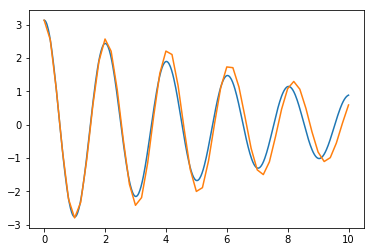

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(tex,pendulumTheta(tex[0:],theta0,b,m,g,length))

plt.plot(t,solution[:,0])

np.shape(sol)
np.shape(t)

<br>
<hr class="top">
## Solution : Pendulum
<hr class="bot">
<br>

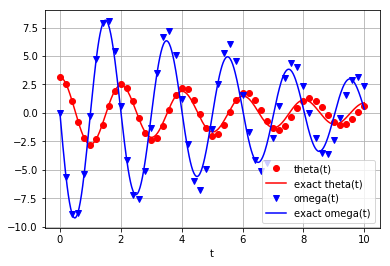

In [26]:
# %load pendulum.py
# Plot the numerical and exact solutions for a simple pendulum

# to inline plots in a notebook, uncomment line below
# %matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
plt.plot(t, solution[:, 0], 'ro', label='theta(t)')
plt.plot(tex[0:], pendulumTheta(tex[0:],theta0,b,m,g,length), 'r-', label='exact theta(t)')
plt.plot(t, solution[:, 1], 'bv', label='omega(t)')
plt.plot(tex[0:], pendulumOmega(tex[0:],theta0,b,m,g,length), 'b-', label='exact omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()



<br>
<hr class="top">
## Optimisation
<hr class="bot">
<br>

* Several classical optimisation algorithms
  * Least squares fitting
  * Quasi-Newton type optimisations
  * Simulated annealing
  * General purpose root finding


<br>
<hr class="top">
## Least-squares fit
<hr class="bot">
<br>

Use `scipy.optimize.leastsq` to fit some measured data, $\{x_i,\,y_i\}$, to a function:

$$
y\,=\,A\,\sin(2\pi k x \,+\, \theta)
$$

where the parameters $A$, $k$, and $\theta$ are unknown. The residual vector, that will be squared and summed by `leastsq` to fit the data, is:

$$
e_i\,=\, ∣∣ \, y_i \,− \,A\sin(2\pi k x_i + \theta)∣∣
$$

By defining a function to compute the residuals, $e_i$, and, selecting appropriate starting values, `leastsq` can be used to find the best-fit parameters $\hat{A}$, $\hat{k}$, $\hat{\theta}$.

<br>
<hr class="top">
## Least-squares fit
<hr class="bot">
<br>

Create a sample of true values, and the "measured" (noisy) data. Define the residual function and initial values.
<br>

In [ ]:
# set up true function and "measured" data
x = np.arange(0, 6e-2, 6e-2 / 30)
A, k, theta = 10, 1.0 / 3e-2, np.pi / 6

y_true = A * np.sin(2.0*np.pi*k*x + theta)
y_meas = y_true + 2.0*np.random.randn(len(x))

In [ ]:
# Function to compute the residual
def residuals(p, y, x):
    A, k, theta = p
    err = y - A * np.sin(2 * np.pi * k * x + theta)
    return err

<br>
<hr class="top">
## Least-squares fit
<hr class="bot">
<br>

For easy evaluation of the model function parameters [A, K, theta], we define a function.

In [ ]:
def peval(x, p):
    return p[0]*np.sin(2.0*np.pi*p[1]*x + p[2])

# starting values of A, k and theta
p0 = [8, 1 / 2.3e-2, np.pi / 3]
print(np.array(p0))

<br>
<hr class="top">
## Least-squares fit
<hr class="bot">
<br>

<p style="font-size: 100%">Do least squares fitting and plot results</p>

In [ ]:
# do least squares fitting
from scipy.optimize import leastsq

plsq = leastsq(residuals, p0, args=(y_meas, x))
print(plsq[0])
print(np.array([A, k, theta]))

In [ ]:
# and plot the true function, measured (noisy) data 
# and the model function with fitted parameters 
plt.plot(x, peval(x, plsq[0]), x, y_meas, 'o', x, y_true)

plt.title('Least-squares fit to noisy data')
plt.legend(['Fit', 'Noisy', 'True'])
plt.show()

<br>
<hr class="top">
## Special functions
<hr class="bot">
<br>

* SciPy contains huge set of special functions 
  * Bessel functions
  * Legendre functions
  * Gamma functions 
  * Airy functions 
 
We will see special functions used in the following sections.
<br>


<br>
<hr class="top">
## Example: `scipy.special`
<hr class="bot">
<br>

* Many problems with circular or cylindrical symmetry have solutions involving Bessel functions
* E.g., height of a oscillating drumhead related to $J_n(x)$

We will use

http://docs.scipy.org/doc/scipy-0.14.0/reference/special.html
<br>
<br>

In [ ]:
# drumhead example
from scipy import special

def drumhead_height(n, k, distance, angle, t):
    # kth zero is last element of returned array
    kth_zero = special.jn_zeros(n, k)[-1]
    return (np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero))

In [ ]:
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
print(theta)

x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5)
              for r in radius])
# contd...

<br>
<hr class="top">
## Drumhead (cont.)
<hr class="bot">
<br>

Plot the height of a drumhead using a 3-d axis set
 

In [ ]:
# ...contd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(8, 4))
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

<br>
<hr class="top">
## Summary
<hr class="bot">
<br>

* <p style="font-size: 100%">As we have seen, SciPy has a wide range of useful functionality for scientific computing. </p>


* <p style="font-size: 100%">In case it does not have what you need, there are other packages with specialised functionality. </p>

#### Other packages

* <p style="font-size: 100%">Pandas</p>

  * <p style="font-size: 100%">Offers R-like statistical analysis of numerical tables and time series</p>


* <p style="font-size: 100%">SymPy</p>

  * <p style="font-size: 100%">Python library for symbolic computing</p>


* <p style="font-size: 100%">scikit-image</p>

  * <p style="font-size: 100%">Advanced image processing</p>
  
  
* <p style="font-size: 100%">scikit-learn</p>

  * <p style="font-size: 100%">Package for machine learning</p>
  
  
* <p style="font-size: 100%">Sage</p>

  * <p style="font-size: 100%">Open source replacement for Mathematica / Maple / Matlab (built using Python)</p>

<br>

* Next: MPI4PY

<br>
<hr class="top">
## Exercise : CFD (optional)
<hr class="bot">
<br>

#### No computational fluid dynamics experience required...

Look for the CFD exercise directory in the course material. The instructions are
given in a pdf file in the `doc` directory.

#### Aim

To investigate the efficiency of various methods of updating `numpy` arrays.

#### Note

We will discuss the the compilation of C/Fortran versions in the coupling lecture.

#### Extra

Below is some material that is relevant to the CFD exercise.

<br>
<hr class="top">
## Extra : Convolutions with `scipy.signal`
<hr class="bot">
<br>

<p style="font-size: 100%">In image and signal processing, the result of applying a filter (or mask) to an image (or signal) can be determined by a convolution between the two. </p>

In [ ]:
# Example
import numpy as np
from scipy import signal

a = np.array([[1, 2, 3, 4], [5, 6, 7, 8],[9, 10, 11, 12]])
mask = np.array([[1,1,1],[1,0,1],[1,1,1]])
result = signal.convolve(a, mask)
print("a:\n", a)
print("mask:\n", mask)
print("result:\n", result)

<br>
<hr class="top">
## Extra : Convolution process
<hr class="bot">
<br>

What `signal.convolve` does, schematically:

<img src="convolve.jpg" style="width: 85%">

<br>
<hr class="top">
## Extra : Convolutions with `scipy.ndimage`
<hr class="bot">
<br>

SciPy has another <i>convolve</i> function

In [ ]:
# Exercise: Scipy has another convolve function, ndimage.convolve  
# What does this produce, when used in 'constant' mode (below)?

from scipy import ndimage
result2 = ndimage.convolve(a, mask, mode='constant')

# The default mode for ndimage.convolve is 'reflect'. Investigate. 


In [ ]:
result3 = ndimage.convolve(a, mask, mode='reflect')
print(result3)

<br>
<hr class="top">
<hr class="bot">
<br>

In [ ]:
# This cell is for the presenter
from IPython.core.display import display, HTML

styles = open("../style.css", "r").read()
display(HTML(styles))